# Imports

In [30]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

#from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.3.0
Sklearn  0.24.2


# Load Data

In [31]:
df = pd.read_csv('./train.csv', index_col='Id')
df_test = pd.read_csv('./test.csv', index_col='Id')

In [32]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [33]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# Check Missing

df Columns to drop:

- Alley #5
- FireplaceQu #56
- PoolQC #71
- Fence #72
- MiscFeature #73

df_test Columns to drop:

- Alley #5
- FireplaceQu #56
- PoolQC #71
- Fence #72
- MiscFeature #73

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

## Deniz's check missing

In [35]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

pd.set_option('display.max_rows', None)

missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [36]:
pd.reset_option('^display.', silent=True)

# Feature Extraction

In [37]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot:>

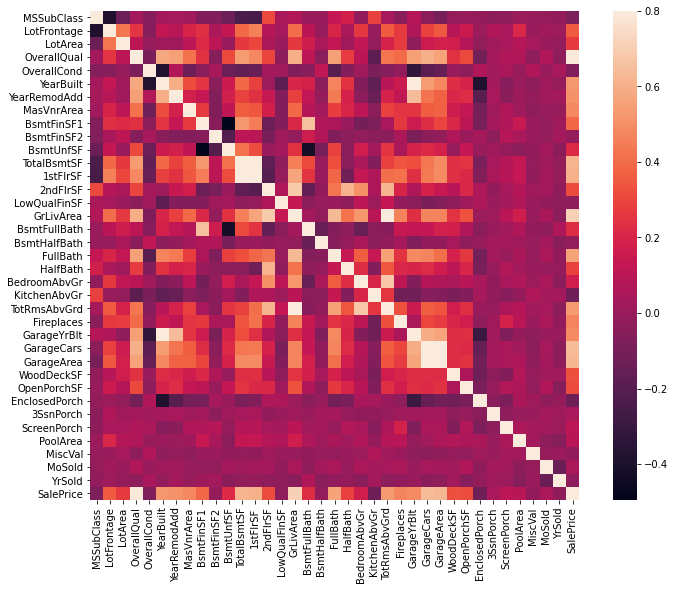

In [38]:
cor_map = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cor_map, vmax=.8, square=True)

In [39]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
# clean_num_df = df[['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', \
#     'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', \
#     'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'LotArea', 'LotFrontage']]

# clean_num_df

# x & y

In [41]:
# HANDPICKED NUM COLUMNS

x = df[['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', \
    'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', \
    'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'LotArea', 'LotFrontage']]
y = df['SalePrice']

x_test = df_test[['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', \
    'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', \
    'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'LotArea', 'LotFrontage']]

# Validation Stratergy

In [42]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    x, y,
    test_size=0.2,
    #stratify=y,
    random_state=1
)

# Prepro Pipeline

In [43]:
num_vars = ['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', \
    'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', \
    'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'LotArea', 'LotFrontage']

In [44]:
num_preprocessing = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer()),
    ('normalization', QuantileTransformer())
])

prepro = compose.ColumnTransformer(transformers=[
    ('num', num_preprocessing, num_vars)
])

prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('normalization',
                                                  QuantileTransformer())]),
                                 ['OpenPorchSF', 'WoodDeckSF', 'GarageArea',
                                  'GarageCars', 'GarageYrBlt', 'Fireplaces',
                                  'TotRmsAbvGrd', 'FullBath', 'GrLivArea',
                                  '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',
                                  'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd',
                                  'YearBuilt', 'OverallQual', 'LotArea',
                                  'LotFrontage'])])

In [45]:
x_train_prepro = prepro.fit_transform(x_train)
x_val_prepro = prepro.transform(x_val)

x_test_prepro = prepro.transform(x_test)

# Model Pipeline

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
model = RandomForestRegressor()
model.fit(x_train_prepro, y_train)

RandomForestRegressor()

In [48]:
full_model = pipeline.Pipeline([('Preproccessing', prepro), ('Model', model)])
full_model

Pipeline(steps=[('Preproccessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('normalization',
                                                                   QuantileTransformer())]),
                                                  ['OpenPorchSF', 'WoodDeckSF',
                                                   'GarageArea', 'GarageCars',
                                                   'GarageYrBlt', 'Fireplaces',
                                                   'TotRmsAbvGrd', 'FullBath',
                                                   'GrLivArea', '2ndFlrSF',
                                                   '1stFlrSF', 'TotalBsmtSF',
                                                   'BsmtFinSF1', 'MasVnrArea',
                                                   'YearRemodAdd', 'YearBuilt',
                                                   'OverallQual', 'LotArea',
                                                   'LotFrontage'])])),
                ('Model', RandomForestRegressor())])

# Cross Validation

In [49]:
from sklearn.model_selection import cross_validate

In [50]:
cv_results = cross_validate(model, x_val_prepro, y_val)
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [51]:
print("Cross validation test scores:\n", cv_results['test_score'])

Cross validation test scores:
 [0.8860522  0.8651428  0.90376245 0.78470848 0.90018448]


# Standard Accuracy Testing

In [52]:
y_pred = model.predict(x_test_prepro)
print("Accuracy:\t", model.score(x_val_prepro, y_val)*100)

Accuracy:	 90.82738302074759


# Save Model

In [53]:
submission_df = pd.DataFrame(y_pred)
submission_df

,0
0,125396.58
1,155040.32
2,189819.80
3,183190.32
4,195727.39
...,...
1454,79484.00
1455,85473.75
1456,160628.45
1457,120042.00


In [54]:
submission_df.index = x_test.index
submission_df = submission_df.rename(columns= {0 : 'SalePrice'})

In [55]:
submission_df

,SalePrice
Id,
1461,125396.58
1462,155040.32
1463,189819.80
1464,183190.32
1465,195727.39
...,...
2915,79484.00
2916,85473.75
2917,160628.45


In [56]:
#submission_df.to_csv('kaggle_sub.csv')